In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve

In [2]:
LI = -np.loadtxt('./softmax_scores/confidence_Our_In.txt', delimiter=',')[:,2]
LO = -np.loadtxt('./softmax_scores/confidence_Our_Out.txt', delimiter=',')[:,2]
LI.shape, LO.shape

((9000,), (9000,))

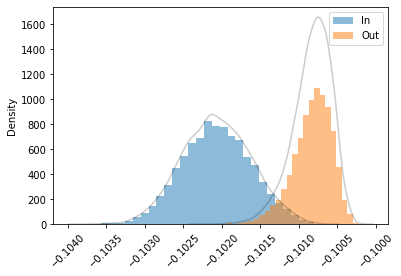

In [3]:
plt.hist(LI, 30, alpha=0.5)
plt.hist(LO, 30, alpha=0.5)
plt.xticks(rotation=45)
plt.legend(labels=["In", "Out"])
sns.kdeplot(data=LO, color='black', alpha=0.2)
sns.kdeplot(data=LI, color='black', alpha=0.2)
plt.show()

In [4]:
p,r,t = precision_recall_curve([0]*len(LI)+[1]*len(LO), list(LI)+list(LO))
f = p*r*2/(p+r)
print(p.shape, r.shape, t.shape, f.shape)

(17296,) (17296,) (17295,) (17296,)


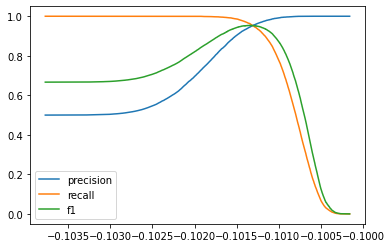

In [5]:
plt.plot(t, p[:-1])
plt.plot(t, r[:-1])
plt.plot(t, f[:-1])
plt.legend(labels=["precision", "recall", "f1"])
plt.show()

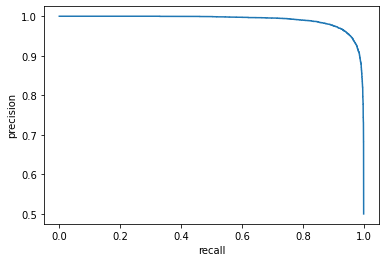

In [6]:
plt.plot(r, p)
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

In [8]:
bestT = t[np.argmax(f)]
bestT

-0.10134144872426987

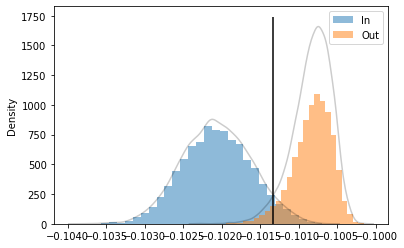

In [17]:
plt.hist(LI, 30, alpha=0.5)
plt.hist(LO, 30, alpha=0.5)
plt.legend(labels=["In", "Out"])
sns.kdeplot(data=LO, color='black', alpha=0.2)
sns.kdeplot(data=LI, color='black', alpha=0.2)
plt.vlines(bestT, plt.ylim()[0], plt.ylim()[1], colors="black")
plt.show()

In [18]:
LO<bestT

array([False, False, False, ..., False, False, False])